# Churn Modelling for Travel and Tours Agency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customertravel.csv')
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


# Exploratory Data Analysis

In [4]:
for c in df.columns:
    if df[c].dtype=='object':
        df[c]=df[c].astype('category')
    else:
        df[c]=df[c].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         954 non-null    float64 
 1   FrequentFlyer               954 non-null    category
 2   AnnualIncomeClass           954 non-null    category
 3   ServicesOpted               954 non-null    float64 
 4   AccountSyncedToSocialMedia  954 non-null    category
 5   BookedHotelOrNot            954 non-null    category
 6   Target                      954 non-null    float64 
dtypes: category(4), float64(3)
memory usage: 26.7 KB


In [6]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


<Figure size 216x216 with 0 Axes>

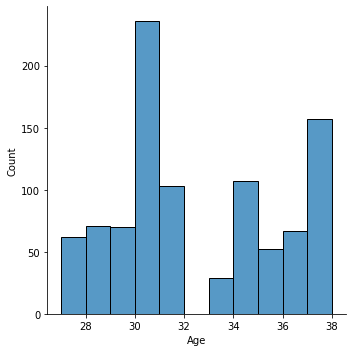

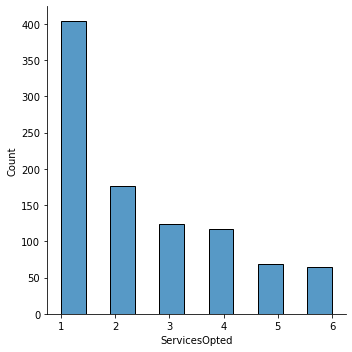

In [7]:
plt.figure(figsize=(3,3))
for c in ['Age','ServicesOpted']:
    sns.displot(x=df[c])

/home/nyaiko/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nyaiko/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nyaiko/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

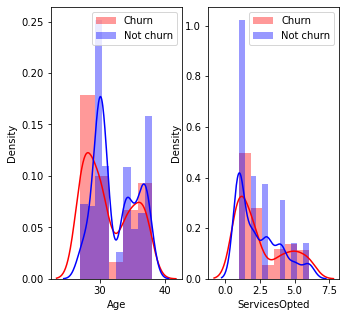

In [8]:
plt.figure(figsize=(8,5))
df_1 = df[df['Target']==1]
df_0 = df[df['Target']==0]
i = 1
for c in ['Age','ServicesOpted']:
    plt.subplot(1,3,i)
    sns.distplot(df_1[c],color='red',label='Churn')
    sns.distplot(df_0[c],color='blue',label='Not churn')
    plt.legend()
    i=i+1

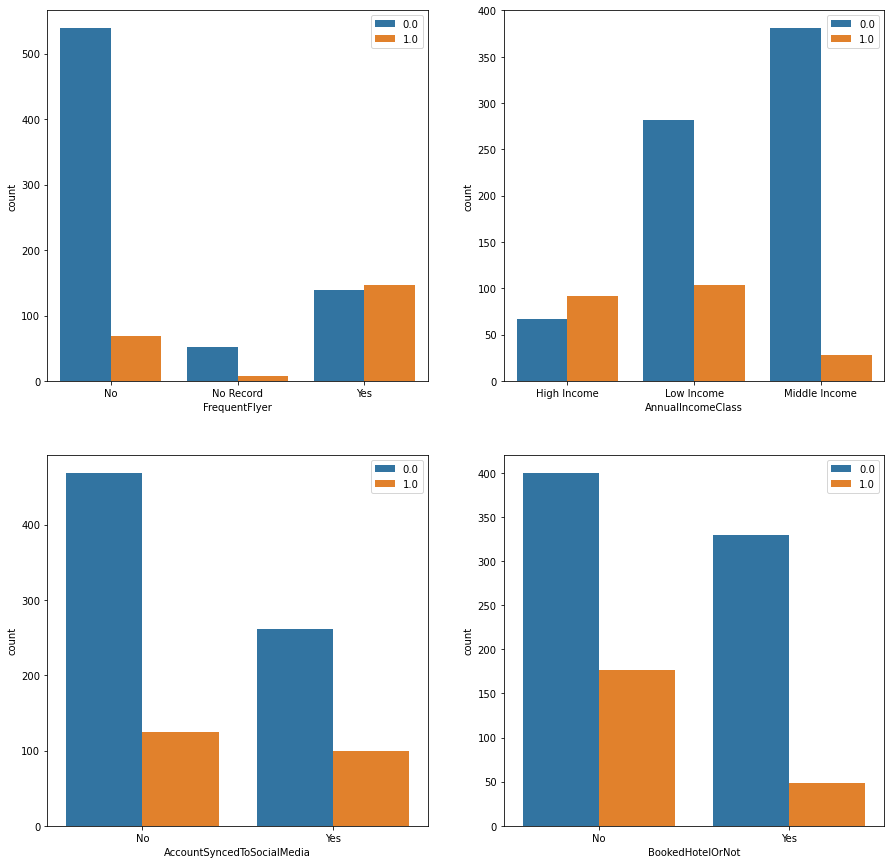

In [9]:
plt.figure(figsize=(15,15))
df_1 = df[df['Target']==1]
df_0 = df[df['Target']==0]
i = 1
for c in ['FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot']:
    plt.subplot(2,2,i)
    #df_1[[c]].countplot()
    #df_2[[c]].countplot()
    sns.countplot(data=df,x=c,hue='Target')
    plt.legend()
    i=i+1

<AxesSubplot:>

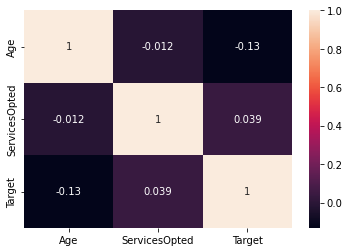

In [10]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

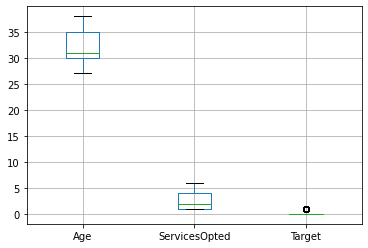

In [11]:
df.boxplot()

In [12]:
df.describe(include='category')

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
count,954,954,954,954
unique,3,3,2,2
top,No,Middle Income,No,No
freq,608,409,594,576


# Model building

In [13]:
df['AnnualIncomeClass']=df['AnnualIncomeClass'].replace({'Low Income':1, 'Middle Income':2,'High Income':3})

In [14]:
from sklearn.model_selection import train_test_split
df_ = df.drop(['Age','ServicesOpted','BookedHotelOrNot'],axis=1).drop_duplicates()
df_ = df.drop_duplicates()
X = df_.drop(['Target'],axis=1)
y = df_['Target']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=33)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler,PolynomialFeatures,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD

In [23]:
cat_selector = make_column_selector(dtype_include='category')
num_selector = make_column_selector(dtype_exclude='category')

col_transformer= make_column_transformer((RobustScaler(),num_selector),(OneHotEncoder(handle_unknown='ignore'),cat_selector))

preprocessor = make_pipeline(col_transformer)

In [24]:
lr = make_pipeline(preprocessor,LogisticRegression(max_iter=1000,warm_start=True,n_jobs=-1,class_weight='balanced'))
lr.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('robustscaler',
                                                                   RobustScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd32eb9df40>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd32ea6ad90>)]))])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1, warm_start=True))])

In [25]:
from sklearn.model_selection import GridSearchCV
grid = {'logisticregression__C':[0.01,0.1,0.2,0.5,1]}

gs = GridSearchCV(estimator=lr,param_grid=grid,scoring='f1',n_jobs=-1)
gs.fit(X_train,Y_train)
print('Best Score: ',gs.best_score_)
print('Best Param: ',gs.best_params_)

Best Score:  0.5767870732894085
Best Param:  {'logisticregression__C': 0.5}


In [26]:
lr_ = gs.best_estimator_

In [27]:
lr_.score(X_test,Y_test)

0.6111111111111112

In [28]:
print(classification_report(Y_test,lr_.predict_proba(X_test)[:,1]>=0.5))

              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69        65
         1.0       0.38      0.64      0.48        25

    accuracy                           0.61        90
   macro avg       0.60      0.62      0.58        90
weighted avg       0.69      0.61      0.63        90



### Let us try by removing outliers with Isolation Forest

In [29]:
from sklearn.ensemble import IsolationForest
isf = make_pipeline(preprocessor,IsolationForest(contamination=0.2))
isf.fit(X_train,Y_train)
non_outliers = isf.predict(X_train)==1

In [30]:
x_train = X_train[non_outliers]
y_train = Y_train[non_outliers]
svc = make_pipeline(preprocessor,SVC(probability=True,C=0.1,class_weight='balanced'))
svc.fit(x_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('robustscaler',
                                                                   RobustScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd32eb9df40>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd32ea6ad90>)]))])),
                ('svc', SVC(C=0.1, class_weight='balanced', probability=True))])

In [31]:
svc.fit(x_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('robustscaler',
                                                                   RobustScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd32eb9df40>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fd32ea6ad90>)]))])),
                ('svc', SVC(C=0.1, class_weight='balanced', probability=True))])

In [32]:
svc.score(X_test,Y_test)

0.6777777777777778

In [33]:
print(classification_report(Y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.66      0.75        65
         1.0       0.45      0.72      0.55        25

    accuracy                           0.68        90
   macro avg       0.66      0.69      0.65        90
weighted avg       0.75      0.68      0.69        90



In [34]:
from sklearn.model_selection import GridSearchCV
grid = {'svc__C':[0.01,0.1,0.2,0.5,1,100,200,300]}

gs = GridSearchCV(estimator=svc,param_grid=grid,scoring='f1',n_jobs=-1)
gs.fit(x_train,y_train)
print('Best Score: ',gs.best_score_)
print('Best Param: ',gs.best_params_)

Best Score:  0.6795136852394917
Best Param:  {'svc__C': 200}


In [35]:
svm_ = gs.best_estimator_

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, auc,f1_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

def f1(y_true,y_pred):
    return f1_score(y_true,y_pred)

thresholds = np.linspace(0.01,0.9,10)
best_thresholds=None
best_score=-1

for threshold in thresholds:
    y_scores = cross_val_predict(svm_,x_train,y_train,cv=cv,method='predict_proba')[:,1]
    y_pred = (y_scores>threshold).astype(int)
    score = f1(y_train,y_pred)
    if score > best_score:
        best_score=score
        best_threshold=threshold

print('Best threshold:  ', best_threshold)
print('Best Score: ', best_score)

Best threshold:   0.30666666666666664
Best Score:  0.6746987951807228


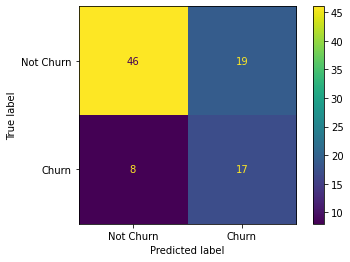

In [40]:
cm = confusion_matrix(Y_test,svm_.predict_proba(X_test)[:,1]>=best_threshold)
ConfusionMatrixDisplay(cm,display_labels=['Not Churn','Churn']).plot()

In [160]:
print(classification_report(Y_test,svm_.predict_proba(X_test)[:,1]>=best_threshold))

              precision    recall  f1-score   support

         0.0       0.90      0.68      0.77        65
         1.0       0.49      0.80      0.61        25

    accuracy                           0.71        90
   macro avg       0.69      0.74      0.69        90
weighted avg       0.78      0.71      0.73        90



# Results:
* As we tuned the model, we had around 0.50 precision, 0.80 for the recall. and 0.61 for the F1 Score. The final metrics are not good in terms of test a model on new data.
* But we the model is good at detecting customer churn with a clear objective of saving the company's money. It is quite acceptable the false prediction on négative labels. 
* When finding is the customer is churning, it is recommended to set the threshold probability to 0.3

In [161]:
import joblib
joblib.dump(svm_,'svm.p')

['svm.p']